# Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Loading the labels

In [6]:
train_labels = pd.read_csv("/kaggle/input/vindr-cxr-classification/image_labels_train.csv")
test_labels = pd.read_csv("/kaggle/input/vindr-cxr-classification/image_labels_test.csv")

# Data Analysis

## Train labels


In [7]:
# Display first five rows
train_labels.head()

,image_id,rad_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,...,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion,COPD,Lung tumor,Pneumonia,Tuberculosis,Other diseases,No finding
0,000434271f63a053c4128a0ba6352c7f,R2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,000434271f63a053c4128a0ba6352c7f,R3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,000434271f63a053c4128a0ba6352c7f,R6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,00053190460d56c53cc3e57321387478,R11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,00053190460d56c53cc3e57321387478,R2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
# Display last five rows
train_labels.tail()

,image_id,rad_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,...,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion,COPD,Lung tumor,Pneumonia,Tuberculosis,Other diseases,No finding
44995,fff0f82159f9083f3dd1f8967fc54f6a,R8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44996,fff0f82159f9083f3dd1f8967fc54f6a,R9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44997,fff2025e3c1d6970a8a6ee0404ac6940,R1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44998,fff2025e3c1d6970a8a6ee0404ac6940,R2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44999,fff2025e3c1d6970a8a6ee0404ac6940,R5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   image_id            45000 non-null  object
 1   rad_id              45000 non-null  object
 2   Aortic enlargement  45000 non-null  int64 
 3   Atelectasis         45000 non-null  int64 
 4   Calcification       45000 non-null  int64 
 5   Cardiomegaly        45000 non-null  int64 
 6   Clavicle fracture   45000 non-null  int64 
 7   Consolidation       45000 non-null  int64 
 8   Edema               45000 non-null  int64 
 9   Emphysema           45000 non-null  int64 
 10  Enlarged PA         45000 non-null  int64 
 11  ILD                 45000 non-null  int64 
 12  Infiltration        45000 non-null  int64 
 13  Lung Opacity        45000 non-null  int64 
 14  Lung cavity         45000 non-null  int64 
 15  Lung cyst           45000 non-null  int64 
 16  Mediastinal shift   45

In [10]:
train_labels.shape

(45000, 30)

## Test labels

In [11]:
# Display first five rows
test_labels.head()

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,Enlarged PA,...,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion,COPD,Lung tumor,Pneumonia,Tuberculosis,Other disease,No finding
0,e0dc2e79105ad93532484e956ef8a71a,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,0aed23e64ebdea798486056b4f174424,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,aa15cfcfca7605465ca0513902738b95,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,665c4a6d2693dc0286d65ab479c9b169,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,42da2c134b53cb5594774d3d29faac59,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


There are 29 columns in test_label dataset because it does not have rad_id column.

In [12]:
# Display last five rows
test_labels.tail()

,image_id,Aortic enlargement,Atelectasis,Calcification,Cardiomegaly,Clavicle fracture,Consolidation,Edema,Emphysema,Enlarged PA,...,Pneumothorax,Pulmonary fibrosis,Rib fracture,Other lesion,COPD,Lung tumor,Pneumonia,Tuberculosis,Other disease,No finding
2995,a039af299f86007d0d77da077a6def9a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2996,aba3d1f5b1c04236f52a8980929b2cfa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2997,6d3d6b53f358a983b486e9e03144eb62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2998,d6678cb7ae39f575d35ab9da6d7cb171,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2999,e82d33dfd04d95c61d8d133dcbf29691,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
test_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   image_id            3000 non-null   object
 1   Aortic enlargement  3000 non-null   int64 
 2   Atelectasis         3000 non-null   int64 
 3   Calcification       3000 non-null   int64 
 4   Cardiomegaly        3000 non-null   int64 
 5   Clavicle fracture   3000 non-null   int64 
 6   Consolidation       3000 non-null   int64 
 7   Edema               3000 non-null   int64 
 8   Emphysema           3000 non-null   int64 
 9   Enlarged PA         3000 non-null   int64 
 10  ILD                 3000 non-null   int64 
 11  Infiltration        3000 non-null   int64 
 12  Lung Opacity        3000 non-null   int64 
 13  Lung cavity         3000 non-null   int64 
 14  Lung cyst           3000 non-null   int64 
 15  Mediastinal shift   3000 non-null   int64 
 16  Nodule/Mass         3000

In [14]:
test_labels.shape

(3000, 29)

## EDA


The following piece of code is showing that the different radiologists classify each x-ray to a different disease. Even in some cases one x ray is classified to multiple diseases by one radiologist.

In [15]:
# Define target columns
target_columns = ["COPD", "Lung tumor", "Pneumonia", "Tuberculosis", "Other diseases", "No finding"]

In [16]:
# Group by 'image_id' and sum the target columns
grouped = train_labels.groupby("image_id")[target_columns].sum()
grouped

,COPD,Lung tumor,Pneumonia,Tuberculosis,Other diseases,No finding
image_id,,,,,,
000434271f63a053c4128a0ba6352c7f,0,0,0,0,0,3
00053190460d56c53cc3e57321387478,0,0,0,0,0,3
0005e8e3701dfb1dd93d53e2ff537b6e,0,2,3,2,0,0
0006e0a85696f6bb578e84fafa9a5607,0,0,0,0,0,3
0007d316f756b3fa0baea2ff514ce945,0,0,0,0,3,0
...,...,...,...,...,...,...
ffe6f9fe648a7ec29a50feb92d6c15a4,0,0,0,0,3,0
ffea246f04196af602c7dc123e5e48fc,0,0,0,0,0,3
ffeffc54594debf3716d6fcd2402a99f,0,0,0,0,3,0


In [17]:
# Identify rows where more than one target column has values greater than 0
rows_with_multiple_nonzero = grouped[grouped.gt(0).sum(axis=1) > 1]

In [18]:
# Reset index to make 'image_id' a separate column
rows_with_multiple_nonzero = rows_with_multiple_nonzero.reset_index()

In [19]:
# Display the resulting dataset
rows_with_multiple_nonzero.head()

,image_id,COPD,Lung tumor,Pneumonia,Tuberculosis,Other diseases,No finding
0,0005e8e3701dfb1dd93d53e2ff537b6e,0,2,3,2,0,0
1,001d127bad87592efe45a5c7678f8b8d,0,0,0,3,2,0
2,0046f681f078851293c4e710c4466058,0,0,0,3,1,0
3,009d4c31ebf87e51c5c8c160a4bd8006,0,0,2,0,3,0
4,00aca42a24e4ea6066cca2546150c36e,0,0,1,0,3,0


In [20]:
# Filter the original labels DataFrame using the image_ids from rows_with_multiple_nonzero
filtered_labels = train_labels[train_labels["image_id"].isin(rows_with_multiple_nonzero["image_id"])]
should_visualized = ["image_id", "rad_id"] + target_columns

filtered_labels[should_visualized].head()

,image_id,rad_id,COPD,Lung tumor,Pneumonia,Tuberculosis,Other diseases,No finding
6,0005e8e3701dfb1dd93d53e2ff537b6e,R10,0,0,1,1,0,0
7,0005e8e3701dfb1dd93d53e2ff537b6e,R8,0,1,1,0,0,0
8,0005e8e3701dfb1dd93d53e2ff537b6e,R9,0,1,1,1,0,0
27,001d127bad87592efe45a5c7678f8b8d,R10,0,0,0,1,0,0
28,001d127bad87592efe45a5c7678f8b8d,R8,0,0,0,1,1,0


Checking Skewness in the data

In [21]:
# Count the number of 1's in each target column
target_counts = {column: train_labels[column].sum() for column in target_columns}

# Display the counts
for column, count in target_counts.items():
    print(f"Count of 1's for {column}: {count}")

Count of 1's for COPD: 46
Count of 1's for Lung tumor: 478
Count of 1's for Pneumonia: 1570
Count of 1's for Tuberculosis: 1479
Count of 1's for Other diseases: 11794
Count of 1's for No finding: 31685


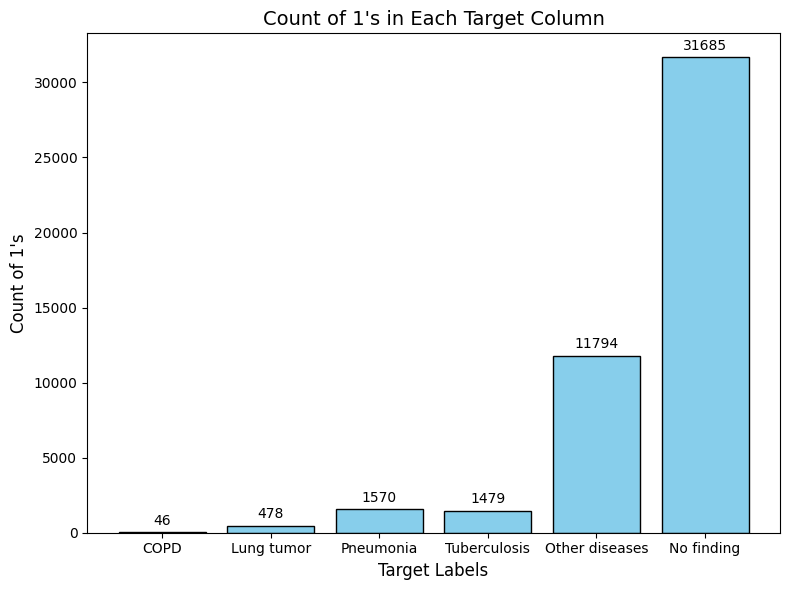

In [22]:
# Data for the bar graph
target_counts = {
    "COPD": 46,
    "Lung tumor": 478,
    "Pneumonia": 1570,
    "Tuberculosis": 1479,
    "Other diseases": 11794,
    "No finding": 31685,
}

# Extract keys (labels) and values (counts)
labels = list(target_counts.keys())
counts = list(target_counts.values())

# Create the bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color='skyblue', edgecolor='black')

# Add title and labels
plt.title("Count of 1's in Each Target Column", fontsize=14)
plt.xlabel("Target Labels", fontsize=12)
plt.ylabel("Count of 1's", fontsize=12)

# Add value annotations on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 500, str(count), ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# Preparing labels

## For Training

In [23]:
# Define target columns
target_columns = ["COPD", "Lung tumor", "Pneumonia", "Tuberculosis", "Other diseases", "No finding"]

In [24]:
train_labels.shape

(45000, 30)

In [25]:
# Separate features and target labels from train_labels
X = train_labels.drop(columns=target_columns + ["image_id", "rad_id"])
y = train_labels[target_columns]

In [26]:
X.shape

(45000, 22)

In [27]:
y.shape

(45000, 6)

In [28]:
# Splitting train_labels
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape

(36000, 22)

In [30]:
X_val.shape

(9000, 22)

In [31]:
y_train.shape

(36000, 6)

In [32]:
y_val.shape

(9000, 6)

## For Testing

In [33]:
test_labels.shape

(3000, 29)

In [34]:
# Renaming test_labels column to make it according to train_labels column
test_labels = test_labels.rename(columns={"Other disease": "Other diseases"})

In [35]:
# Removing image_id column from test_labels
X_test = test_labels.drop(columns=target_columns + ["image_id"])
y_test = test_labels[target_columns]

In [36]:
X_test.shape

(3000, 22)

In [37]:
y_test.shape

(3000, 6)

# Checking for Multi-label Cases

In [38]:
multi_label_rows_train = y_train.sum(axis=1) > 1
multi_label_rows_test = y_test.sum(axis=1) > 1
print(f"Number of multi-label rows in training data: {multi_label_rows_train.sum()}")
print(f"Number of multi-label rows in testing data: {multi_label_rows_test.sum()}")

Number of multi-label rows in training data: 1580
Number of multi-label rows in testing data: 192


# Multi-label Classification

In [39]:
!pip install scikit-multilearn

In [41]:
from sklearn.multioutput import MultiOutputClassifier

In [43]:
X.train = np.array(X_train)
y.train = np.array(y_train)
X.val = np.array(X_val)
y.val = np.array(y_val)
X.test = np.array(X_test)
y.test = np.array(y_test)

<ipython-input-43-d052a875652d>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.train = np.array(X_train)
<ipython-input-43-d052a875652d>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  y.train = np.array(y_train)
<ipython-input-43-d052a875652d>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.val = np.array(X_val)
<ipython-input-43-d052a875652d>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  y.val = np.array(y_val)
<ipython-input-43-d052a875652d>:5: UserWarning: Pandas doesn't allow columns to be created via a

# Trainig Random Forest Classifier

In [ ]:
# Define ensemble models
random_forest_en = RandomForestClassifier(random_state=42)

In [ ]:
print("Training Random Forest . . .")
random_forest_en.fit(X_train, y_train)

y_val_pred = random_forest_en.predict(X_val)
print("\n\nValidation Results\n")
print(classification_report(y_val, y_val_pred))
print("Validation Accuracy: ", accuracy_score(y_val, y_val_pred))

print("\n\nTesting Random Forest . . .")
y_test_pred = random_forest_en.predict(X_test)
print("\n\nTest Results\n")
print(classification_report(y_test, y_test_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Training Random Forest . . .


Validation Results

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.47      0.18      0.26        96
           2       0.74      0.72      0.73       301
           3       0.67      0.35      0.46       314
           4       0.92      0.98      0.95      2421
           5       1.00      1.00      1.00      6277

   micro avg       0.96      0.95      0.96      9418
   macro avg       0.78      0.65      0.69      9418
weighted avg       0.96      0.95      0.95      9418
 samples avg       0.97      0.97      0.97      9418

Validation Accuracy:  0.9385555555555556


Testing Random Forest . . .


Test Results

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.47      0.10      0.16        80
           2       0.83      0.45      0.59       246
           3       0.80      0.27      0.41     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Training a Random Forest using MultiOutputClassifier()

In [48]:
# Multi-Label Classification using RandomForest
model = RandomForestClassifier(random_state=42)
multi_label_model = MultiOutputClassifier(model)

# Train the model
multi_label_model.fit(X_train, y_train)

# Make predictions
y_pred = multi_label_model.predict(X_test)

# Evaluate the model
print("Classification Report (Multi-Label):")
print(classification_report(y_test, y_pred, target_names=target_columns))

Classification Report (Multi-Label):
                precision    recall  f1-score   support

          COPD       0.50      0.50      0.50         2
    Lung tumor       0.42      0.10      0.16        80
     Pneumonia       0.83      0.47      0.60       246
  Tuberculosis       0.77      0.28      0.41       164
Other diseases       0.75      0.98      0.85       657
    No finding       1.00      1.00      1.00      2051

     micro avg       0.92      0.90      0.91      3200
     macro avg       0.71      0.55      0.59      3200
  weighted avg       0.91      0.90      0.89      3200
   samples avg       0.93      0.92      0.92      3200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.8786666666666667


# Saving the Models


In [ ]:
# import joblib

joblib.dump(random_forest_en, 'random_forest_model.pkl')
print("Model saved successfully!")

joblib.dump(multi_label_model, 'multi_label_random_forest.pkl')
print("Multi-label model saved successfully!")

Multi-label model saved successfully!
